In [1]:
import pickle

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white')

import warnings
warnings.filterwarnings('ignore')

In [5]:
# read in csv file, originally downloaded from UCI Repo

diab = pd.read_csv('../data/diabetic_data.csv')

### Data preprocessing

In [6]:
# for clarity

diab.rename(columns={'change': 'change_diabetes_med'}, inplace=True)

In [7]:
# Replace '?' with nulls

diab.replace('?', np.nan, inplace=True)

In [8]:
# Dropping features

diab.drop(columns='weight', inplace=True) # drop weight column (97% missing)

diab.drop(columns=['encounter_id', 'patient_nbr'], inplace=True) # not relevant information

diab.drop(columns='citoglipton', inplace=True) # 0 people taking. No predictive value.
diab.drop(columns='examide', inplace=True) # 0 people taking. No predictive value.
diab.drop(columns='metformin-rosiglitazone', inplace=True) # 0 people taking. No predictive value.

diab.drop(columns=['diag_1', 'diag_2', 'diag_3'], inplace=True) # Thousands of possibilities, hard to interpret

diab = diab[diab['gender'] != 'Unknown/Invalid'] # Drop 3 rows with 'invalid' gender

In [9]:
# Fill null values of categorical features with 'Unknown'

diab['race'] = diab['race'].fillna('Unknown') 
diab['payer_code'] = diab['payer_code'].fillna('Unknown')
diab['medical_specialty'] = diab['medical_specialty'].fillna('Unknown')

In [11]:
# Replace 'No' with 0. Replace 'Ch' and 'Yes' with 1. 

diab = diab.replace(to_replace=['No', 'Ch', 'Yes'], value=[0, 1, 1]) 

### Remove patients who can't be readmitted due to death, hospice care, or prolonged inpatient stay

In [12]:
no_readmit = diab['discharge_disposition_id'].isin([5, 8, 9, 11, 12, 13, 14, 19, 20, 21, 23, 24])
diab = diab.loc[~no_readmit]

### Label Discharge ID's

In [13]:
# Make new column "Discharged_to" that maps Discharge IDs to understandable outcomes
# ~ 88% of patients are discharged home or to an SNF 

diab.loc[diab['discharge_disposition_id'] == 27, 'Discharged_to'] = 'Federal_health_care_facility'
diab.loc[diab['discharge_disposition_id'] == 10, 'Discharged_to'] = 'Neonate_hospital'
diab.loc[diab['discharge_disposition_id'] == 16, 'Discharged_to'] = 'Outside_outpatient_services'
diab.loc[diab['discharge_disposition_id'] == 17, 'Discharged_to'] = 'Inhouse_outpatient_services'
diab.loc[diab['discharge_disposition_id'] == 15, 'Discharged_to'] = 'Medicare_approved_swingbed'
diab.loc[diab['discharge_disposition_id'] == 28, 'Discharged_to'] = 'Psychiatric_hospital'
diab.loc[diab['discharge_disposition_id'] == 7, 'Discharged_to'] = 'Against_medical_advice***'
diab.loc[diab['discharge_disposition_id'] == 4, 'Discharged_to'] = 'Intermediate_care_facility'
diab.loc[diab['discharge_disposition_id'] == 25, 'Discharged_to'] = 'Info_unavailable'
diab.loc[diab['discharge_disposition_id'] == 22, 'Discharged_to'] = 'Rehab_facility'
diab.loc[diab['discharge_disposition_id'] == 2, 'Discharged_to'] = 'Another_short_term_hospital'
diab.loc[diab['discharge_disposition_id'] == 18, 'Discharged_to'] = 'NULL'
diab.loc[diab['discharge_disposition_id'] == 6, 'Discharged_to'] = 'Home_with_home_health_service'
diab.loc[diab['discharge_disposition_id'] == 3, 'Discharged_to'] = 'Skilled_nursing_facility'
diab.loc[diab['discharge_disposition_id'] == 1, 'Discharged_to'] = 'Home' # ~ 61% of patients discharged home w/o services

In [14]:
diab.drop(columns='discharge_disposition_id', inplace=True) # drop the original column

### Reformat Age Values

In [15]:
# For readability purposes

diab.loc[diab['age'] == '[70-80)', 'age'] = '70-80'
diab.loc[diab['age'] == '[60-70)', 'age'] = '60-70'
diab.loc[diab['age'] == '[50-60)', 'age'] = '50-60'
diab.loc[diab['age'] == '[80-90)', 'age'] = '80-90'
diab.loc[diab['age'] == '[40-50)', 'age'] = '40-50'
diab.loc[diab['age'] == '[30-40)', 'age'] = '30-40'
diab.loc[diab['age'] == '[90-100)', 'age'] = '90-100'
diab.loc[diab['age'] == '[20-30)', 'age'] = '20-30'
diab.loc[diab['age'] == '[10-20)', 'age'] = '10-20'
diab.loc[diab['age'] == '[0-10)', 'age'] = '0-10'

### Label Admission Type ID's

In [16]:
# Make new column "admission_type" that maps numerical ID's to understandable admission type information 
# ~ 70% of encounters are tagged 'emergency' or 'urgent'

diab.loc[diab['admission_type_id'] == 1, 'admission_type'] = 'Emergency' # 53% of admissions are emergency visits
diab.loc[diab['admission_type_id'] == 3, 'admission_type'] = 'Elective'
diab.loc[diab['admission_type_id'] == 2, 'admission_type'] = 'Urgent'
diab.loc[diab['admission_type_id'] == 6, 'admission_type'] = 'NULL'
diab.loc[diab['admission_type_id'] == 5, 'admission_type'] = 'Not_available'
diab.loc[diab['admission_type_id'] == 8, 'admission_type'] = 'Not_mapped'
diab.loc[diab['admission_type_id'] == 7, 'admission_type'] = 'Trauma_center'
diab.loc[diab['admission_type_id'] == 4, 'admission_type'] = 'Newborn'

In [17]:
diab.drop(columns='admission_type_id', inplace=True) # drop the original column

### Label Admission Source ID's

In [18]:
# Make new column "admission_source" that maps numerical ID's to understandable admission source information
# ~85% of patients come via ER or physician referral

diab.loc[diab['admission_source_id'] == 7, 'admission_source'] = 'Emergency_room' # ~56% for ER visit
diab.loc[diab['admission_source_id'] == 1, 'admission_source'] = 'Physician_referral'
diab.loc[diab['admission_source_id'] == 17, 'admission_source'] = 'NULL'
diab.loc[diab['admission_source_id'] == 4, 'admission_source'] = 'Transfer_from_hospital'
diab.loc[diab['admission_source_id'] == 6, 'admission_source'] = 'Transfer_from_other_healthcare_facility'
diab.loc[diab['admission_source_id'] == 2, 'admission_source'] = 'Clinic_referral'
diab.loc[diab['admission_source_id'] == 5, 'admission_source'] = 'Transfer_from_SNF'
diab.loc[diab['admission_source_id'] == 3, 'admission_source'] = 'HMO_referral'
diab.loc[diab['admission_source_id'] == 20, 'admission_source'] = 'Not_mapped'
diab.loc[diab['admission_source_id'] == 9, 'admission_source'] = 'Not_available'
diab.loc[diab['admission_source_id'] == 8, 'admission_source'] = 'Law_enforcement'
diab.loc[diab['admission_source_id'] == 22, 'admission_source'] = 'Transfer_from_inpatient_care_from_same_facility'
diab.loc[diab['admission_source_id'] == 10, 'admission_source'] = 'Transfer_from_critical_access_hospital'
diab.loc[diab['admission_source_id'] == 11, 'admission_source'] = 'Normal_delivery'
diab.loc[diab['admission_source_id'] == 14, 'admission_source'] = 'Extramural_birth'
diab.loc[diab['admission_source_id'] == 25, 'admission_source'] = 'Transfer_from_ambulatory_surgery'
diab.loc[diab['admission_source_id'] == 13, 'admission_source'] = 'Sick_baby'

In [19]:
diab.drop(columns='admission_source_id', inplace=True) # drop the original column

### Define target variable

In [20]:
# 12-13% of patients are readmitted within 30 days

diab['readmitted'].value_counts()

NO     51608
>30    34952
<30    11004
Name: readmitted, dtype: int64

In [21]:
# Define target "positive" variable to be readmission within 30 days

diab['readmitted_within_30days'] = (diab['readmitted'] == '<30').astype(int)

In [22]:
diab['readmitted_within_30days'].value_counts()

0    86560
1    11004
Name: readmitted_within_30days, dtype: int64

In [23]:
# Don't want model to 'cheat'

diab.drop(columns='readmitted', inplace=True)

In [24]:
# Export to CSV (before one-hot encoding and other feature engineering) 

# diab.to_csv('Diabetes_1.csv', index=False)

### EDA

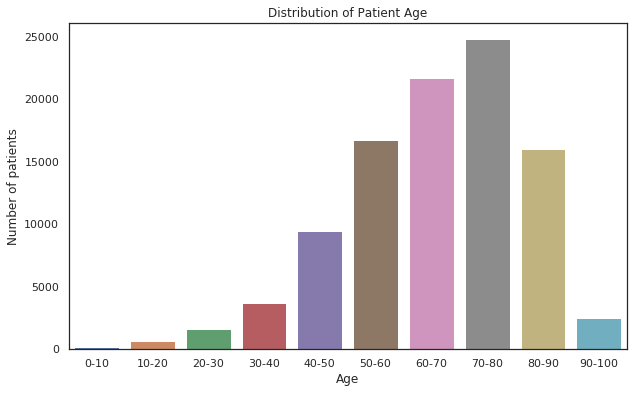

In [25]:
# Distribution of patient age

plt.figure(figsize=(10, 6))

ax = sns.countplot(diab['age'])

ax.set(xlabel='Age',
       ylabel='Number of patients', 
       title='Distribution of Patient Age');

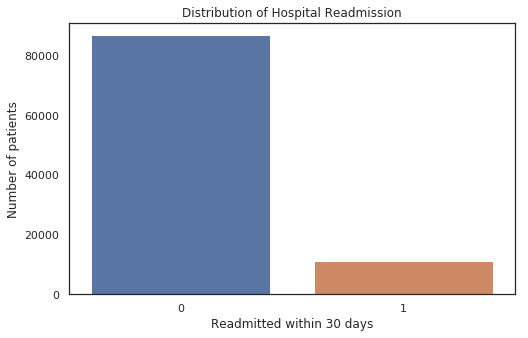

In [26]:
# Hospital readmission rate

plt.figure(figsize=(8, 5))

ax = sns.countplot(diab['readmitted_within_30days'])

ax.set(xlabel='Readmitted within 30 days',
       ylabel='Number of patients',
       title='Distribution of Hospital Readmission');

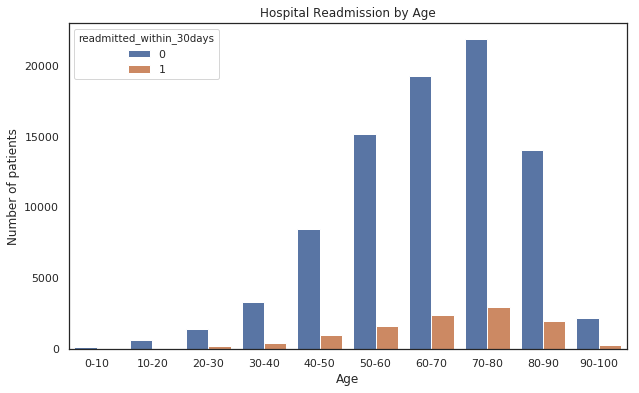

In [27]:
# Readmission by age of patient

plt.figure(figsize=(10, 6))

ax = sns.countplot(diab['age'], hue=diab['readmitted_within_30days'])

ax.set(xlabel='Age',
       ylabel='Number of patients',
       title='Hospital Readmission by Age');

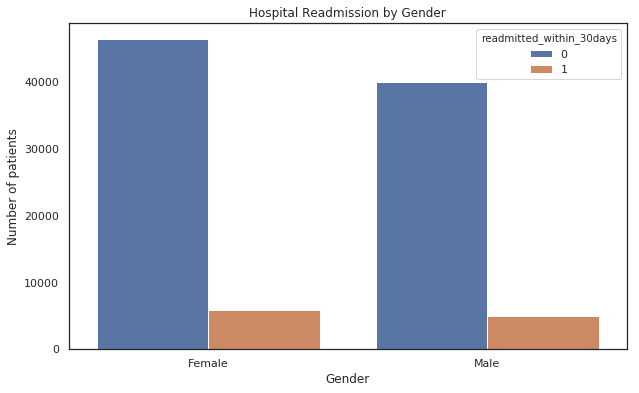

In [28]:
# Readmission by gender of patient

plt.figure(figsize=(10, 6))

ax = sns.countplot(diab['gender'], hue=diab['readmitted_within_30days'])

ax.set(xlabel='Gender',
       ylabel='Number of patients',
       title='Hospital Readmission by Gender');

### Why is A1C test so often not administered?

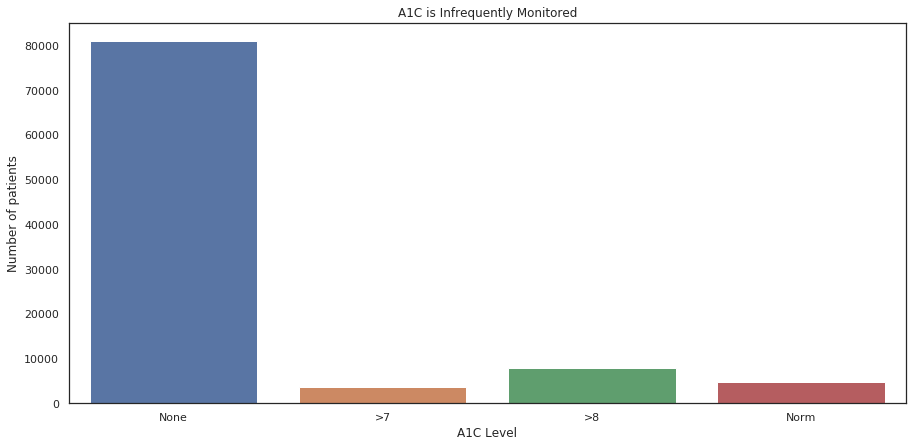

In [29]:
# How often is A1C measured?
# A1C is a sound measure of a patient's blood glucose level over the past 2-3 months. 
# Very important for diabetes monitoring.
# This chart reflects how often this simple test is overlooked during patient's initial hospitalization. 

plt.figure(figsize=(15, 7))

ax = sns.countplot(diab['A1Cresult'])

ax.set(xlabel='A1C Level',
       ylabel='Number of patients',
       title='A1C is Infrequently Monitored');

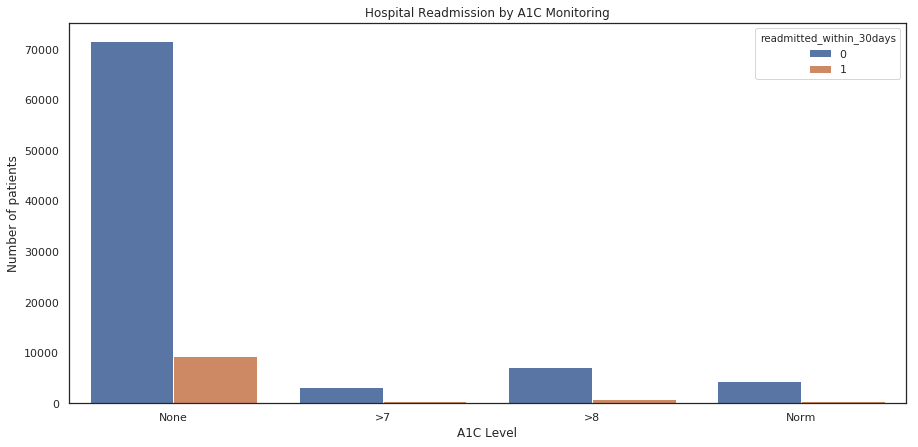

In [30]:
# Readmission by A1C Monitoring

plt.figure(figsize=(15, 7))

ax = sns.countplot(diab['A1Cresult'], hue=diab['readmitted_within_30days'])

ax.set(xlabel='A1C Level',
       ylabel='Number of patients',
       title='Hospital Readmission by A1C Monitoring');

In [31]:
# Higher likelihood of readmission within 30 days when released to
# rehab facility (28%) than those who left "against medical advice" (14%)

diab.groupby(['Discharged_to', 'readmitted_within_30days']).count().reset_index()

,Discharged_to,readmitted_within_30days,race,gender,age,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change_diabetes_med,diabetesMed,admission_type,admission_source
0,Against_medical_advice***,0,533,533,533,533,533,533,533,533,...,533,533,533,533,533,533,533,533,533,533
1,Against_medical_advice***,1,90,90,90,90,90,90,90,90,...,90,90,90,90,90,90,90,90,90,90
2,Another_short_term_hospital,0,1786,1786,1786,1786,1786,1786,1786,1786,...,1786,1786,1786,1786,1786,1786,1786,1786,1786,1786
3,Another_short_term_hospital,1,342,342,342,342,342,342,342,342,...,342,342,342,342,342,342,342,342,342,342
4,Federal_health_care_facility,0,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
5,Home,0,54630,54630,54630,54630,54630,54630,54630,54630,...,54630,54630,54630,54630,54630,54630,54630,54630,54630,54630
6,Home,1,5602,5602,5602,5602,5602,5602,5602,5602,...,5602,5602,5602,5602,5602,5602,5602,5602,5602,5602
7,Home_with_home_health_service,0,11264,11264,11264,11264,11264,11264,11264,11264,...,11264,11264,11264,11264,11264,11264,11264,11264,11264,11264
8,Home_with_home_health_service,1,1638,1638,1638,1638,1638,1638,1638,1638,...,1638,1638,1638,1638,1638,1638,1638,1638,1638,1638
9,Info_unavailable,0,897,897,897,897,897,897,897,897,...,897,897,897,897,897,897,897,897,897,897


In [32]:
# More prior inpatient encounters =  higher chance of readmission within 30 days

diab.groupby(['number_inpatient', 'readmitted_within_30days']).count().head()

race  gender    age  \
number_inpatient readmitted_within_30days                         
0                0                         59561   59561  59561   
                 1                          5518    5518   5518   
1                0                         16194   16194  16194   
                 1                          2441    2441   2441   
2                0                          5887    5887   5887   

                                           time_in_hospital  payer_code  \
number_inpatient readmitted_within_30days                                 
0                0                                    59561       59561   
                 1                                     5518        5518   
1                0                                    16194       16194   
                 1                                     2441        2441   
2                0                                     5887        5887   

                                           medical_specialty  \
number_inpatient readmitted_within_30days                      
0                0                                     59561   
                 1                                      5518   
1                0                                     16194   
                 1                                      2441   
2                0                                      5887   

                                           num_lab_procedures  num_procedures  \
number_inpatient readmitted_within_30days                                       
0                0                                      59561           59561   
                 1                                       5518            5518   
1                0                                      16194           16194   
                 1                                       2441            2441   
2                0                                       5887            5887   

                                           num_medications  number_outpatient  \
number_inpatient readmitted_within_30days                                       
0                0                                   59561              59561   
                 1                                    5518               5518   
1                0                                   16194              16194   
                 1                                    2441               2441   
2                0                                    5887               5887   

                                                 ...         insulin  \
number_inpatient readmitted_within_30days        ...                   
0                0                               ...           59561   
                 1                               ...            5518   
1                0                               ...           16194   
                 1                               ...            2441   
2                0                               ...            5887   

                                           glyburide-metformin  \
number_inpatient readmitted_within_30days                        
0                0                                       59561   
                 1                                        5518   
1                0                                       16194   
                 1                                        2441   
2                0                                        5887   

                                           glipizide-metformin  \
number_inpatient readmitted_within_30days                        
0                0                                       59561   
                 1                                        5518   
1                0                                       16194   
                 1                                        2441   
2                0                                        5887   

                                

In [33]:
# More prior emergency encounters = higher chance of readmission within 30 days

diab.groupby(['number_emergency', 'readmitted_within_30days']).count().reset_index().head()

,number_emergency,readmitted_within_30days,race,gender,age,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change_diabetes_med,diabetesMed,Discharged_to,admission_type,admission_source
0,0,0,77476,77476,77476,77476,77476,77476,77476,77476,...,77476,77476,77476,77476,77476,77476,77476,77476,77476,77476
1,0,1,9152,9152,9152,9152,9152,9152,9152,9152,...,9152,9152,9152,9152,9152,9152,9152,9152,9152,9152
2,1,0,6291,6291,6291,6291,6291,6291,6291,6291,...,6291,6291,6291,6291,6291,6291,6291,6291,6291,6291
3,1,1,1078,1078,1078,1078,1078,1078,1078,1078,...,1078,1078,1078,1078,1078,1078,1078,1078,1078,1078
4,2,0,1586,1586,1586,1586,1586,1586,1586,1586,...,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586


### One hot encoding

In [46]:
# All categorical featurese

cats = ['race', 'gender', 'age', 'max_glu_serum', 'A1Cresult', 'admission_type', 'Discharged_to', 'admission_source',
        'payer_code', 'medical_specialty', 'change_diabetes_med', 'diabetesMed', 'insulin', 'metformin', 'glipizide',
        'glyburide', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'tolbutamide', 'pioglitazone',
        'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'glyburide-metformin', 'glipizide-metformin',
        'metformin-pioglitazone', 'acetohexamide', 'glimepiride-pioglitazone', 'readmitted_within_30days']

df_cat = pd.get_dummies(diab[cats])

### Numerical variables

In [47]:
nums = ['number_outpatient', 'number_inpatient', 'number_emergency', 'number_diagnoses',
        'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications']

df_num = diab[nums]

### Concatenate numerical and categorical DataFrames into master DataFrame

In [38]:
df = pd.concat([df_num, df_cat], axis=1)

In [39]:
# Move target variable to the final column for readability purposes

target = df.pop('readmitted_within_30days')
df['readmitted_within_30days'] = target

In [40]:
# Rename columns to avoid XGBoost error

df.rename(columns={'max_glu_serum_>200': 'max_glu_serum_greater_200',
                     'max_glu_serum_>300': 'max_glu_serum_greater_300',
                     'A1Cresult_>7': 'A1Cresult_greater_7',
                     'A1Cresult_>8': 'A1Cresult_greater_8',
                      }, inplace=True)

### EDA part 2

In [41]:
# Cursory glance at which factors influence readmission rates

df.groupby(['readmitted_within_30days']).mean()

,number_outpatient,number_inpatient,number_emergency,number_diagnoses,time_in_hospital,num_lab_procedures,num_procedures,num_medications,change_diabetes_med,diabetesMed,...,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_0,glipizide-metformin_Steady,metformin-pioglitazone_0,metformin-pioglitazone_Steady,acetohexamide_0,acetohexamide_Steady,glimepiride-pioglitazone_0,glimepiride-pioglitazone_Steady
readmitted_within_30days,,,,,,,,,,,,,,,,,,,,,
0,0.362835,0.554286,0.178674,7.361114,4.298972,42.675716,1.341751,15.821003,0.460860,0.768403,...,0.006966,0.000092,0.999861,0.000139,0.999988,0.000012,0.999988,0.000012,0.999988,0.000012
1,0.441839,1.231189,0.361778,7.699836,4.752090,44.203835,1.287804,16.893857,0.490004,0.802254,...,0.006634,0.000000,0.999909,0.000091,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000


### Simply testing A1C levels may lower readmission rates 

In [43]:
# Patients who are readmitted in < 30 days are LESS likely to have had A1C measured 
# than those who were not readmitted in < 30 days.

df.groupby(['readmitted_within_30days'])['A1Cresult_None'].mean()

readmitted_within_30days
0    0.827923
1    0.852781
Name: A1Cresult_None, dtype: float64

In [44]:
# Patients who are readmitted in < 30 days are LESS likely to have had a normal A1C result
# than those who were not readmitted in < 30 days 

df.groupby(['readmitted_within_30days'])['A1Cresult_Norm'].mean()

readmitted_within_30days
0    0.050578
1    0.042439
Name: A1Cresult_Norm, dtype: float64

### Pickle

In [45]:
with open('df.pkl', 'wb') as f:
    pickle.dump(df, f)

### Modeling

In [118]:
X, y = (df.iloc[:,:-1], df.iloc[:, -1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Scale

In [124]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) #hmmmmmmm

### Address class imbalance by oversampling the positive class

In [125]:
# Oversample the positive observations to deal with class imbalance
# Leads to higher recall and AUC than passing "class_weight: balanced"

n_pos = np.sum(y_train == 1) # 7665 observations
n_neg = np.sum(y_train == 0) # 60629 observations
ratio = {1 : n_pos * 8, 0 : n_neg}

ROS = imblearn.over_sampling.RandomOverSampler(ratio = ratio) 
    
X_train, y_train = ROS.fit_sample(X_train, y_train)

### Logistic Regression

In [126]:
logistic = LogisticRegression(solver='liblinear', C= .5, penalty='l1') 
logistic.fit(X_train, y_train)
y_pred_logistic = logistic.predict(X_test)

In [2272]:
# Tune hyperparameters

param_grid_log = {
                 'C': [.5, 1, 5],
                 'penalty': ['l1', 'l2']
             }

auc_score = make_scorer(roc_auc_score) # Optimize AUC

logistic = RandomizedSearchCV(logistic, param_grid_log, cv=2, scoring = auc_score, verbose=True)
logistic.fit(X_train, y_train)

In [2276]:
logistic.best_params_

{'C': 0.5, 'penalty': 'l1'}

In [127]:
y_proba_logistic = logistic.predict_proba(X_test)[:,1]
fpr_ros, tpr_ros, thresh = roc_curve(y_test, y_proba_logistic)

In [128]:
# Optimized Logistic Regression Scores

print('AUC:', auc(fpr_ros, tpr_ros))
print('F1 Score:', f1_score(y_test, y_pred_logistic))
print('F 1.5 Score:', fbeta_score(y_test, y_pred_logistic, 1.5))
print('Recall:', recall_score(y_test, y_pred_logistic))
print('Precision:', precision_score(y_test, y_pred_logistic))
print('Accuracy:', accuracy_score(y_test, y_pred_logistic))

AUC: 0.6584374027903521
F1 Score: 0.20427817390499123
F 1.5 Score: 0.2942580786384656
Recall: 0.9966867469879518
Precision: 0.11380128623998349
Accuracy: 0.11926887598223437


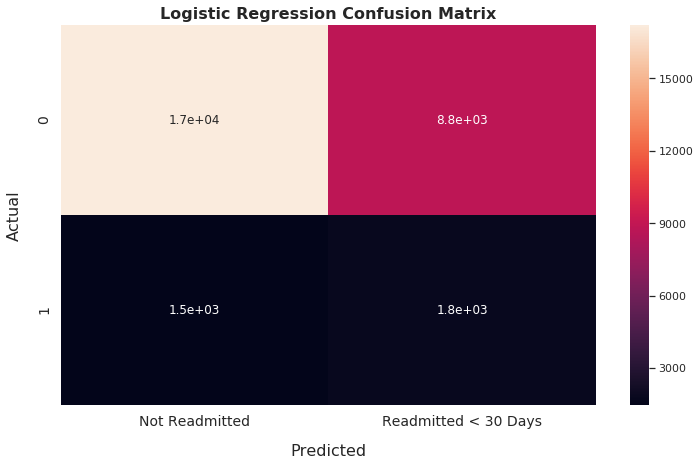

In [2639]:
'''Logistic confusion matrix with oversampling. 
Not a perfect model, but it does a decent job at
minimizing false negatives (optimizing for recall)
'''

plt.figure(figsize=(12, 7))

cm_logistic = confusion_matrix(y_test, y_pred_logistic)
ax = sns.heatmap(cm_logistic, annot=True, cbar=True,
                xticklabels = ['Not Readmitted', 'Readmitted < 30 Days'])

ax.tick_params(labelsize=14)
plt.title('Logistic Regression Confusion Matrix', fontsize=16, fontweight='bold')
plt.xlabel('Predicted', fontsize=16, labelpad=15)
plt.ylabel('Actual', fontsize=16, labelpad=15);


plt.savefig('LogisticRegressionConfusionMatrix.png', bbox_inches='tight')

### KNN (computationally expensive – lower AUC and recall scores)

In [2063]:
# neighbors = KNeighborsClassifier(n_neighbors=10)
# neighbors.fit(X_train_ros, y_train_ros)
# y_prediction_neighbors = neighbors.predict(X_test)

In [2064]:
# # KNN confusion matrix

# plt.figure(figsize=(8, 5))

# cm_neighbors = confusion_matrix(y_test, y_prediction_neighbors)
# ax = sns.heatmap(cm_neighbors, annot=True)
# ax.set(title = 'KNN Confusion Matrix', xlabel='Predicted', ylabel='Actual');

### Naive Bayes (Too many false positives)

In [2286]:
# bayes_model = GaussianNB()
# bayes_model.fit(X_train_ros, y_train_ros)
# y_prediction_bayes = bayes_model.predict(X_test)

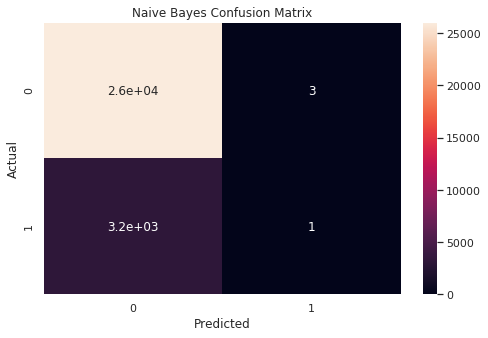

In [2519]:
# Naive confusion matrix
# While the results are skewed in a favorable direction, they are too skewed. 
# Model should privilege false positives, but not to this extent

# plt.figure(figsize=(8, 5))

# cm_neighbors = confusion_matrix(y_test, y_prediction_bayes)
# ax = sns.heatmap(cm_neighbors, annot=True)
# ax.set(title = 'Naive Bayes Confusion Matrix', xlabel='Predicted', ylabel='Actual');

### Support Vector Classifier (Computationaly expensive)

In [2067]:
# svm = SVM()
# svm.fit(X_train, y_train)
# y_prediction_svm = svm.predict(X_test)

### Decision Tree

In [2068]:
# tree = DecisionTreeClassifier(max_depth=8)
# tree.fit(X_train_ros, y_train_ros)
# y_prediction_tree = tree.predict(X_test)

In [2069]:
# y_proba_tree = tree.predict_proba(X_test)[:,1]
# fpr_ros_tree, tpr_ros_tree, thresh = roc_curve(y_test, y_proba_tree)
# print('Tree AUC:', auc(fpr_ros_tree, tpr_ros_tree))
# print('Tree F1 Score:', f1_score(y_test, y_prediction_tree))
# print('Tree F 1.5 Score:', fbeta_score(y_test, y_prediction_tree, 1.5))
# print('Tree Recall:', recall_score(y_test, y_prediction_tree))
# print('Tree Precision:', precision_score(y_test, y_prediction_tree))
# print('Tree Accuracy:', accuracy_score(y_test, y_prediction_tree))

In [2277]:
# Decision Tree confusion matrix
# Skewed 'favorably', but far less precise and lower recall than logistic, forest, and boost models

# plt.figure(figsize=(8, 5))

# cm_neighbors = confusion_matrix(y_test, y_prediction_tree)
# ax = sns.heatmap(cm_neighbors, annot=True)
# ax.set(title = 'Decision Tree Confusion Matrix', xlabel='Predicted', ylabel='Actual');

### Random Forest

In [131]:
forest = RandomForestClassifier(n_estimators = 600, max_depth=12)

forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

KeyboardInterrupt: 

In [2182]:
# Tune hyperparameters

param_grid_forest = {
                 'n_estimators': range(100, 900, 100),
                 'max_depth': range(4, 20, 2),
             }

forest = RandomizedSearchCV(forest, param_grid_forest, n_iter=20, cv=2, scoring=auc_score, verbose=True)
forest.fit(X_train, y_train)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 107.4min finished


RandomizedSearchCV(cv=2, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=20, n_jobs=None,
          param_distributions={'max_depth': range(4, 20, 2), 'n_estimators': range(100, 900, 100)},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=make_scorer(roc_auc_score),
          verbose=True)

In [2180]:
forest.best_params_

{'max_depth': 18, 'n_estimators': 600}

In [2290]:
# Optimized Random Forest Scores
# Highest AUC of all models

y_proba_forest = forest.predict_proba(X_test)[:,1]
fpr_ros_forest, tpr_ros_forest, thresh = roc_curve(y_test, y_proba_forest)
print('Forest AUC:', auc(fpr_ros_forest, tpr_ros_forest))
print('Forest F1 Score:', f1_score(y_test, y_pred_forest))
print('Forest F 1.5 Score:', fbeta_score(y_test, y_pred_forest, 1.5))
print('Forest Recall:', recall_score(y_test, y_pred_forest))
print('Forest Precision:', precision_score(y_test, y_pred_forest))
print('Forest Accuracy:', accuracy_score(y_test, y_pred_forest))

Forest AUC: 0.6546593833089668
Forest F1 Score: 0.263679508654383
Forest F 1.5 Score: 0.33407702667773137
Forest Recall: 0.5832046928064217
Forest Precision: 0.1703489944990531
Forest Accuracy: 0.6395626921762897


In [130]:
'''
Random Forest confusion matrix. This is the best distribution. 
High false positive rate is okay. The model optimizes for recall and AUC.
Captures ~58% of readmissions. Don't want patients to slip through the cracks. 
'''

plt.figure(figsize=(12, 7))

cm_forest = confusion_matrix(y_test, y_pred_forest)
ax = sns.heatmap(cm_forest, annot=True, cbar=True, 
                 xticklabels = ['Not Readmitted', 'Readmitted < 30 Days'])
ax.tick_params(labelsize=14)
# plt.title('Random Forest Confusion Matrix', fontsize=16, fontweight='bold')
plt.xlabel('Predicted', fontsize=16, labelpad=15)
plt.ylabel('Actual', fontsize=16, labelpad=15);

plt.savefig('RandomForestConfusionMatrix.png', bbox_inches='tight')

NameError: name 'y_pred_forest' is not defined

<Figure size 864x504 with 0 Axes>

In [2315]:
# Most Important Features in Random Forest Model

feat_importance = []

for feature in zip(df.columns, forest.feature_importances_):
    feat_importance.append(feature)
    
most_important_features = sorted(feat_importance, key = lambda x: x[1])[-10:]
most_important_features

[('Discharged_to_Skilled_nursing_facility', 0.020113603691767),
 ('num_procedures', 0.02139036212792381),
 ('Discharged_to_Rehab_facility', 0.03807291151320674),
 ('time_in_hospital', 0.03869279557055914),
 ('num_lab_procedures', 0.03977941844765784),
 ('number_diagnoses', 0.04187809881564961),
 ('num_medications', 0.045026106484192446),
 ('number_emergency', 0.046211189709964864),
 ('Discharged_to_Home', 0.07090299229220956),
 ('number_inpatient', 0.20739320640418973)]

In [2631]:
# Feature Importance for Random Forest
    
most_important_features_forest = pd.DataFrame(most_important_features,
                                             columns=['Feature', 'Importance'])

most_important_features_forest.iloc[::-1]
most_important_features_forest.iloc[0, 0] = 'Discharged to Skilled Nursing Facility'
most_important_features_forest.iloc[1, 0] = 'Number of Medical Procedures During Encounter'
most_important_features_forest.iloc[2, 0] = 'Discharged to Rehab Facility'
most_important_features_forest.iloc[3, 0] = 'Time Spent in Hospital'
most_important_features_forest.iloc[4, 0] = 'Number of Lab Procedures During Encounter'
most_important_features_forest.iloc[5, 0] = 'Number of Diagnoses in Patient Chart'
most_important_features_forest.iloc[6, 0] = 'Number of Medications Administered During Encounter'
most_important_features_forest.iloc[7, 0] = 'Number of ER Visits Prior to Encounter'
most_important_features_forest.iloc[8, 0] = 'Discharged Home'
most_important_features_forest.iloc[9, 0] = 'Number of Inpatient Visits Prior to Encounter'

most_important_features_forest = most_important_features_forest.iloc[::-1]



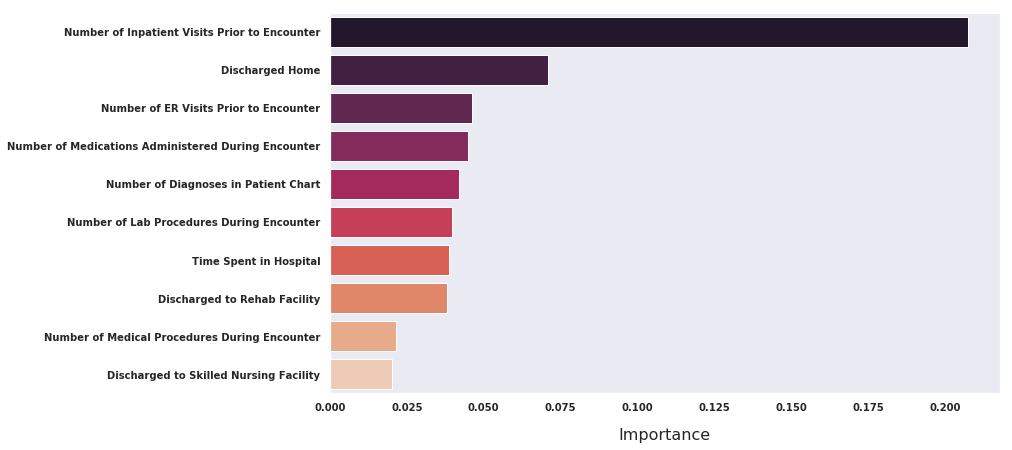

In [2632]:
plt.figure(figsize=(12, 7))

sns.set(style='dark')
ax = sns.barplot(x='Importance', y='Feature', data=most_important_features_forest, palette='rocket')


# plt.title('Top Features in Random Forest Model', fontsize=16, fontweight='bold')
plt.xlabel('Importance', fontsize=16, labelpad=15)
plt.ylabel(None)
plt.xticks(fontweight=600)
plt.yticks(fontweight=600)
ax.tick_params(labelsize=10);

plt.savefig('RandomForestFeatureImportance.png', bbox_inches='tight')

### XGBoost

In [2369]:
boost = xgb.XGBClassifier(n_estimators=700, 
                        max_depth=18,
                        objective='binary:logistic', #new objective
                        learning_rate=.05, 
                        subsample=.9,
                        min_child_weight=1,
                        colsample_bytree=.8)

In [2370]:
boost.fit(X_train, y_train,
        eval_metric='auc')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=18, min_child_weight=1, missing=None, n_estimators=700,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.9)

In [2378]:
# Tune hyperparameters

param_grid_boost = {
    'max_depth': range(6, 12, 4),
    'learning_rate': [.01, .02, .03, .04, .05],
    'min_child_weight': [1, 2, 3],
}

boost = RandomizedSearchCV(boost, param_grid_boost, n_iter=15, cv=2, scoring='roc_auc', verbose=True)
boost.fit(X_train, y_train)

In [ ]:
boost.best_params_

In [ ]:
y_pred_boost = boost.predict(X_test)
y_proba_boost = boost.predict_proba(X_test)[:,1]
fpr_ros_boost, tpr_ros_boost, thresh = roc_curve(y_test, y_proba_boost)

In [ ]:
print('Boost AUC:', auc(fpr_ros_boost, tpr_ros_boost))
print('Boost F1 Score:', f1_score(y_test, y_pred_boost))
print('Boost F 1.5 Score:', fbeta_score(y_test, y_pred_boost, 1.5))
print('Boost Recall:', recall_score(y_test, y_pred_boost))
print('Boost Precision:', precision_score(y_test, y_pred_boost))
print('Boost Accuracy:', accuracy_score(y_test, y_pred_boost))

### Confusion Matrices

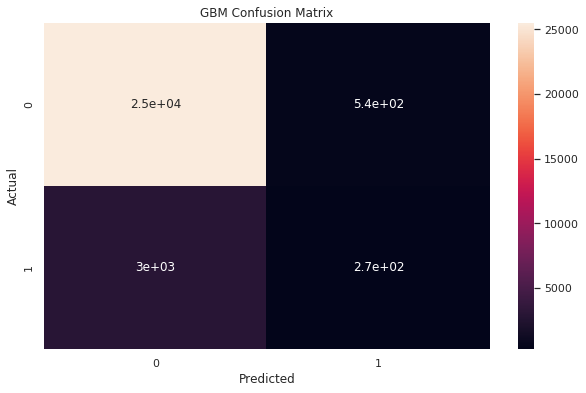

In [2429]:
plt.figure(figsize=(10, 6))

cm_boost = confusion_matrix(y_test, y_pred_boost)
ax = sns.heatmap(cm_boost, annot=True)
ax.set(title = 'GBM Confusion Matrix', xlabel='Predicted', ylabel='Actual');

### Make a table with scores for each model

In [2362]:
# Assign scoring metrics for promising models

model_list = [logistic_model, bayes_model, tree, forest, gbm] # Get rid of KNN for efficiency's sake

accuracy = []
precision = []
recall = []
f1 = []
cross_val = []

def modelScores(models):
    for model in models:

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred))
        f1.append(f1_score(y_test, y_pred))
        cross_val.append(np.mean(cross_val_score(model, X, y)))
    
    return accuracy, precision, recall, f1, cross_val

scores = modelScores(model_list)

In [2363]:
# Convert lists to DataFrame

score_df = pd.DataFrame(list(scores))
score_df = score_df.T
                    
score_df.index=['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Gradient Boost']
score_df.columns=['Accuracy', 'Precision', 'Recall', 'F1', 'Cross_val_score']

score_df

,Accuracy,Precision,Recall,F1,Cross_val_score
Logistic Regression,0.116877,0.111031,0.996295,0.199796,0.718400
Naive Bayes,0.889272,0.250000,0.000309,0.000617,0.147318
Decision Tree,0.559652,0.149601,0.635999,0.242225,0.884927
Random Forest,0.639460,0.170541,0.584440,0.264035,0.887212
Gradient Boost,0.805569,0.214352,0.284038,0.244323,0.887233


In [2384]:
# Assign AUC for each promising model

fpr_values = []
tpr_values = []
auc_values = []

def modelProba(models):

    for model in models:
        y_proba = model.predict_proba(X_test)[:,1]
        fpr, tpr, thresh = roc_curve(y_test, y_proba)
        fpr_values.append(fpr)
        tpr_values.append(tpr)
        auc_values.append(auc(fpr, tpr))
    
    return auc_values

proba = modelProba(model_list)

In [2385]:
# Make a one column DataFrame with each model's AUC

proba_df = pd.DataFrame(proba,
                        index=['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Gradient Boost'],
                        columns=['AUC'])

In [2386]:
# Merge 'AUC' to original scoring metrics DataFrame

all_scores = pd.concat([score_df, proba_df], axis=1)

In [2387]:
all_scores

,Accuracy,Precision,Recall,F1,Cross_val_score,AUC
Logistic Regression,0.116877,0.111031,0.996295,0.199796,0.718400,0.647699
Naive Bayes,0.889272,0.250000,0.000309,0.000617,0.147318,0.500097
Decision Tree,0.559652,0.149601,0.635999,0.242225,0.884927,0.629652
Random Forest,0.639460,0.170541,0.584440,0.264035,0.887212,0.654666
Gradient Boost,0.805569,0.214352,0.284038,0.244323,0.887233,0.637854


In [2388]:
scores_csv = all_scores.to_csv('Diabetes_Model_Scores.csv', index=False) 

### Compare models

In [2580]:
models = ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'XGBoost']

In [2581]:
model_list = [logistic_model, bayes_model, tree, forest, gbm] # Get rid of KNN for efficiency's sake

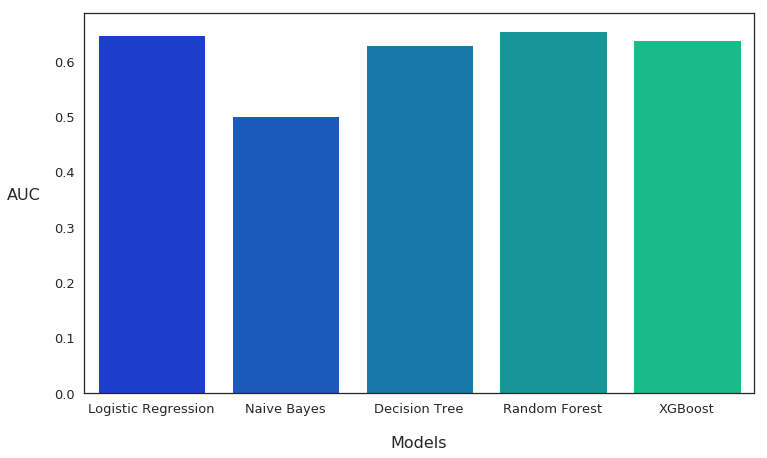

In [2653]:
plt.figure(figsize=(12, 7))

sns.set(style='white')
sns.barplot(x = models, y = proba, data=proba_df, palette= 'winter');


plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Models', labelpad=20, fontsize=16)
plt.ylabel('AUC', rotation='0', labelpad=30, fontsize=16)
# plt.title('AUC for different Models', fontsize=16, fontweight='bold')

plt.savefig('AUC.png', bbox_inches='tight');

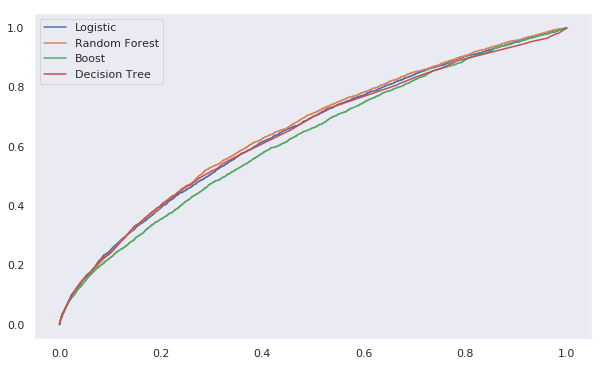

In [2588]:
plt.figure(figsize=(10,6))

plt.plot(fpr_ros, tpr_ros) # logistic
plt.plot(fpr_ros_forest, tpr_ros_forest) # random foreset
plt.plot(fpr_ros_boost, tpr_ros_boost) # xgboost
plt.plot(fpr_ros_tree, tpr_ros_tree) # decision tree
plt.legend(['Logistic', 'Random Forest', 'Boost', 'Decision Tree']);